In [2]:
#Y = Esperanza de vida https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1990
#X1 = Pib per cápita: https://datosmacro.expansion.com/pib?anio=2022
#X2 = C02 per cápita: https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=2021#
#X3 = Densidad de población: https://datosmacro.expansion.com/demografia/poblacion?anio=2022
#X4 = tasa desempleo: https://datosmacro.expansion.com/paro?anio=2022 'Hay que limpiar'
#X5 = Gasto público en salud (%PIB): https://datosmacro.expansion.com/estado/gasto?anio=2020
#X6 = Gasto público en Educación (%PIB): https://datosmacro.expansion.com/estado/gasto?anio=2020
# indice desarrollo humano
# indice de percecpcion de la corrupción: https://datosmacro.expansion.com/estado/indice-percepcion-corrupcion?anio=1995
#(0 = totalmente corrupto)

#Sacar un dataframe de cada una de las consultas con la infomración de país y año. Puedo hacer un merge  así: df_final = pd.merge(df_esperanza_vida, df_pib, on=['país', 'año']) para cuadrar las dos filas. 

Among sociodemographic factors, infant mortality rate, literacy rate, education level, socioeconomic status, population growth, and gender inequality have a significant impact on life expectancy. Gross domestic product, Gini, income level, unemployment rate, and inflation rate are the main macroeconomic factors that significantly correlated with life expectancy. Among various health care resources, health care facilities, the number of the health care profession, public health expenditure, death rates, smoking rate, pollution, and vaccinations had a significant correlation with life expectancy 

-- Anak Agung Bagus Wirayuda, MD, and Moon Fai Chan, PhD 

Results: Limer and Hausman F tests were used to determine the optimal model. Based on these tests in both categories of developed and developing countries, the width of the origin was not the same for all sections and the Panel Data method was used and model estimation in the case of fixed effects over model estimation has priority over other methods.
In developing countries, inflation, unemployment, mortality, and food poverty rates have a negative effect on life expectancy and the impact of economic growth, education, and health expenditures on this index are positive, but due to the level of significance of research variables is observed. The effect of education and health expenditures on life expectancy index is not considered significant. This may be due to the low level of education and spending on health in these countries.
Also, in developed countries, inflation, unemployment, mortality, and food poverty rates have a negative effect on life expectancy and the effect of economic growth, education, and health expenditures on this index is positive, but due to the significant level of research variables, the effect is observed. Inflation and mortality rates are not considered significant on the life expectancy index. This may be due to low inflation and mortality rates in these countries.  
Conclusion: The results of comparing the panels of developed and developing countries show that in almost both categories of studied indicators, the impact of economic and health indicators on life expectancy index in developing countries is more than the developed countries. This can be due to the poor state of economic and health indicators in developing countries compared to developed countries, which with each change in these variables, the status of life expectancy index shows more changes than developed countries. 

-- Allameh Tabataba'i University, Tehran, Iran 

In [3]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [4]:
from bs4 import BeautifulSoup
import requests ## HTTP REQUEST
import re

## Get países (no me serveix de res crec)

In [5]:
# Y = Esperanza de vida al nacer de todos los países del mundo 2018 - 2019
# source: https://datosmacro.expansion.com/demografia/esperanza-vida 
# Need: Lista con los países & esperanza de vida

In [6]:
url = 'https://datosmacro.expansion.com/demografia/esperanza-vida?anio=2018'

In [7]:
response = requests.get(url)

In [237]:
response.status_code

200

In [238]:
soup = BeautifulSoup(response.content, "html.parser")


In [239]:
pais = soup.find_all('a')

In [240]:
pais[76:270]


[<a href="/demografia/esperanza-vida/espana?anio=2018" title="España - Esperanza de vida al nacer">España [+]</a>,
 <a href="/demografia/esperanza-vida/alemania?anio=2018" title="Alemania - Esperanza de vida al nacer">Alemania [+]</a>,
 <a href="/demografia/esperanza-vida/uk?anio=2018" title="Reino Unido - Esperanza de vida al nacer">Reino Unido [+]</a>,
 <a href="/demografia/esperanza-vida/francia?anio=2018" title="Francia - Esperanza de vida al nacer">Francia [+]</a>,
 <a href="/demografia/esperanza-vida/italia?anio=2018" title="Italia - Esperanza de vida al nacer">Italia [+]</a>,
 <a href="/demografia/esperanza-vida/portugal?anio=2018" title="Portugal - Esperanza de vida al nacer">Portugal [+]</a>,
 <a href="/demografia/esperanza-vida/usa?anio=2018" title="Estados Unidos - Esperanza de vida al nacer">Estados Unidos [+]</a>,
 <a href="/demografia/esperanza-vida/japon?anio=2018" title="Japón - Esperanza de vida al nacer">Japón [+]</a>,
 <a href="/demografia/esperanza-vida/china?anio=2

In [241]:
# De 'pais' tengo que quedarme con el nombre del link para luego poder iterar sobre él en las siguientes URL. -->países_url
# También me puedo quedar con parte del text para el dataframe
# El primer item que me interesa está en la fila 76
# El último item de la lista está en el 270

In [242]:
pais[76]['href']

'/demografia/esperanza-vida/espana?anio=2018'

In [243]:
pais_limpio = pais[76]['href'].split('/')[-1].split('?')[0]

In [244]:
pais_limpio

'espana'

In [245]:
paises_url = []
for i in pais[76:270]: 
    paises_url.append(i['href'].split('/')[-1].split('?')[0])

In [246]:
paises_url

['espana',
 'alemania',
 'uk',
 'francia',
 'italia',
 'portugal',
 'usa',
 'japon',
 'china',
 'andorra',
 'emiratos-arabes-unidos',
 'afganistan',
 'antigua-barbuda',
 'albania',
 'armenia',
 'angola',
 'argentina',
 'austria',
 'australia',
 'azerbaiyan',
 'bosnia-herzegovina',
 'barbados',
 'banglades',
 'belgica',
 'burkina-faso',
 'bulgaria',
 'barein',
 'burundi',
 'benin',
 'brunei',
 'bolivia',
 'brasil',
 'bahamas',
 'butan',
 'botsuana',
 'bielorrusia',
 'belice',
 'canada',
 'republica-democratica-congo',
 'republica-centroafricana',
 'congo',
 'suiza',
 'costa-marfil',
 'chile',
 'camerun',
 'colombia',
 'costa-rica',
 'cuba',
 'cabo-verde',
 'chipre',
 'republica-checa',
 'yibuti',
 'dinamarca',
 'dominica',
 'republica-dominicana',
 'argelia',
 'ecuador',
 'estonia',
 'egipto',
 'eritrea',
 'etiopia',
 'finlandia',
 'fiyi',
 'micronesia',
 'gabon',
 'granada',
 'georgia',
 'ghana',
 'gambia',
 'guinea',
 'guinea-ecuatorial',
 'grecia',
 'guatemala',
 'guinea-bisau',
 'gu

In [247]:
url2 = f'https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1990'
print(url2)
response = requests.get(url2)
print(response.status_code)
soup = BeautifulSoup(response.content, "html.parser")

https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1990
200


In [248]:
pais2 = soup.find_all('a')

In [249]:
#pais2[76:267]
paises_url2 = []
for i in pais2[76:270]: 
    paises_url2.append(i['href'].split('/')[-1].split('?')[0])

In [250]:
set1 = set(paises_url)
set2 = set(paises_url2)
elementos_faltantes = set1 - set2

In [251]:
elementos_faltantes

{'andorra', 'liechtenstein', 'san-marino'}

In [252]:
pais[76].get_text().split(' ')[0]

'España'

In [253]:
paises_df = []
for i in pais[76:270]: 
    paises_df.append(i.get_text().split(' ')[0])

In [254]:
paises_df

['España',
 'Alemania',
 'Reino',
 'Francia',
 'Italia',
 'Portugal',
 'Estados',
 'Japón',
 'China',
 'Andorra',
 'Emiratos',
 'Afganistán',
 'Antigua',
 'Albania',
 'Armenia',
 'Angola',
 'Argentina',
 'Austria',
 'Australia',
 'Azerbaiyán',
 'Bosnia',
 'Barbados',
 'Bangladés',
 'Bélgica',
 'Burkina',
 'Bulgaria',
 'Baréin',
 'Burundi',
 'Benin',
 'Brunéi',
 'Bolivia',
 'Brasil',
 'Bahamas',
 'Bután',
 'Botsuana',
 'Bielorrusia',
 'Belice',
 'Canadá',
 'República',
 'República',
 'República',
 'Suiza',
 'Costa',
 'Chile',
 'Camerún',
 'Colombia',
 'Costa',
 'Cuba',
 'Cabo',
 'Chipre',
 'Chequia',
 'Yibuti',
 'Dinamarca',
 'Dominica',
 'República',
 'Argelia',
 'Ecuador',
 'Estonia',
 'Egipto',
 'Eritrea',
 'Etiopía',
 'Finlandia',
 'Fiyi',
 'Estados',
 'Gabón',
 'Granada',
 'Georgia',
 'Ghana',
 'Gambia',
 'Guinea',
 'Guinea',
 'Grecia',
 'Guatemala',
 'Guinea-Bisáu',
 'Guyana',
 'Hong',
 'Honduras',
 'Croacia',
 'Haití',
 'Hungría',
 'Indonesia',
 'Irlanda',
 'Israel',
 'India',
 '

In [255]:
print(len(paises_df))
print(len(paises_url))

194
194


## Get Esperanza de vida 1990 - 2020 (prueba 1, inutil)

In [256]:
life_exp = soup.find_all(class_ = 'numero')

In [257]:
len(life_exp[2::4])

191

In [258]:
life_exp[2]['data-value']

'76.91'

In [259]:
life_exp18 = []
for i in life_exp[2::4]:
    life_exp18.append(i['data-value'])

In [260]:
len(life_exp18)

191

## Esperanza de vida bien sacado (df_esperanza_vida)

In [261]:
#anos = list(range(1990, 2020))
#listas = {}
#for x in anos:
#    lista = 'le'+str(x)[-3:]
#    listas[lista] = []
#    url2 = f'https://datosmacro.expansion.com/demografia/esperanza-vida?anio={str(x)}'
#    print(url2)
#    response = requests.get(url2)
#    print(response.status_code)
#    soup = BeautifulSoup(response.content, "html.parser")
#    life_exp = soup.find_all(class_ = 'numero')
#    for j in life_exp[2::4]:
#        listas[lista].append(j['data-value'])

In [262]:
#for i in listas:
#    print(len(listas[i]))

In [263]:
url = f'https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1990'
print(url)
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.content, "html.parser")
tabla = soup.find_all(class_ = 'table')
tabla_html = str(tabla)
soup = BeautifulSoup(tabla_html, 'html.parser')
filas = soup.find_all('tr') 

pais = []
dato = []
year = []
for fila in filas:
    celdas = fila.find_all('td')
    if len(celdas) >= 4:
        nombre_pais = celdas[0].text.strip()
        pais.append(nombre_pais)
        
        ano = 1990
        year.append(ano)
        
        numero = celdas[3].text.strip()
        dato.append(numero)
data = {'pais':pais, 'year': year, 'life_expectancy':dato}
df1 = pd.DataFrame(data)

https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1990
200


In [264]:
df1

,pais,year,life_expectancy
0,España [+],1990,"76,91"
1,Alemania [+],1990,"77,40"
2,Reino Unido [+],1990,"75,88"
3,Francia [+],1990,"76,60"
4,Italia [+],1990,"77,10"
...,...,...,...
186,Samoa [+],1990,"67,66"
187,Yemen [+],1990,"58,70"
188,Sudáfrica [+],1990,"63,38"
189,Zambia [+],1990,"47,93"


In [265]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/demografia/esperanza-vida?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    life_ex = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            ano = i
            year.append(ano)

            numero = celdas[3].text.strip()
            life_ex.append(numero)
    data = {'pais':pais, 'year': year, 'life_expectancy':life_ex}
    df_resultante = pd.DataFrame(data)
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)


https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1990
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1991
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1992
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1993
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1994
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1995
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1996
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1997
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1998
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=1999
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=2000
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=2001
200
https://datosmacro.expansion.com/demografia/esperanza-vida?anio=2002
200
https://datosmacro.expansion.com/demografia/esperan

In [266]:
df_esperanza_vida = df1

In [267]:
df_esperanza_vida

,pais,year,life_expectancy
0,España [+],1990,"76,91"
1,Alemania [+],1990,"77,40"
2,Reino Unido [+],1990,"75,88"
3,Francia [+],1990,"76,60"
4,Italia [+],1990,"77,10"
...,...,...,...
5973,Samoa [+],2020,"70,34"
5974,Yemen [+],2020,"61,64"
5975,Sudáfrica [+],2020,"62,18"
5976,Zambia [+],2020,"59,64"


## CO2 per cápita (df_CO2)

In [268]:
url = 'https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=2020'
print(url)
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.content, "html.parser")

https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=2020
200


In [269]:
tabla = soup.find_all(class_ = 'table')
tabla_html = str(tabla)
soup = BeautifulSoup(tabla_html, 'html.parser')

In [270]:
soup.find_all('td')[1].get_text().split(' ')[0]

'216,977'

In [271]:
celdas = soup.find_all('td')

In [272]:
celdas[::6][0].get_text().split(' ')[0]

'España'

In [273]:
celdas[4::6][0].div['title']

'4,67'

In [274]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    dato = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            ano = i
            year.append(ano)

            numero = celdas[3].text.strip()
            dato.append(numero)
    data = {'pais':pais, 'year': year, 'co2':dato}
    df_resultante = pd.DataFrame(data)
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)


https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1990
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1991
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1992
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1993
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1994
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1995
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1996
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1997
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1998
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=1999
200
https://datosmacro.expansion.com/energia-y-medio-ambiente/emisiones-co2?anio=2000
200
https://datosmacro.expansion.com/energia-y-medio-ambie

KeyboardInterrupt: 

In [ ]:
df1

In [ ]:
df_CO2 = df1

In [ ]:
df1.duplicated().sum()

In [ ]:
df_esperanza_vida['pais'].value_counts()

In [ ]:
duplicates = df_CO2[df_CO2.duplicated()]

# Muestra las filas duplicadas
print("Filas duplicadas en df_CO2:")
print(duplicates)

In [ ]:
df_final = pd.merge(df_esperanza_vida, df_CO2, on=['pais', 'year'], how='left')

In [ ]:
df_final

## Densidad de población (df_dens_pob)

In [ ]:
url = 'https://datosmacro.expansion.com/demografia/poblacion?anio=1990'

In [ ]:
url = f'https://datosmacro.expansion.com/demografia/poblacion?anio=1990'
print(url)
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.content, "html.parser")
tabla = soup.find_all(class_ = 'table')
tabla_html = str(tabla)
soup = BeautifulSoup(tabla_html, 'html.parser')
filas = soup.find_all('tr') 

pais = []
life_ex = []
year = []
for fila in filas:
    celdas = fila.find_all('td')
    if len(celdas) >= 4:
        nombre_pais = celdas[0].text.strip()
        pais.append(nombre_pais)
        
        ano = 1990
        year.append(ano)
        
        numero = celdas[1].text.strip()
        life_ex.append(numero)
data = {'pais':pais, 'year': year, 'life_expectancy':life_ex}
df1 = pd.DataFrame(data)

In [ ]:
celdas[1]

In [ ]:
df1

In [ ]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/demografia/poblacion?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    dato = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            ano = i
            year.append(ano)

            numero = celdas[1].text.strip()
            dato.append(numero)
    data = {'pais':pais, 'year': year, 'dens_pob':dato}
    df_resultante = pd.DataFrame(data)
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)


In [ ]:
df_dens_pob = df1

In [ ]:
df_dens_pob

In [ ]:
df_final2 = pd.merge(df_final, df_dens_pob, on=['pais', 'year'], how='left')

In [ ]:
df_final2.info()

## Desempleo (df_paro)

In [ ]:
url = 'https://datosmacro.expansion.com/paro?anio=2022'

In [ ]:
url = f'https://datosmacro.expansion.com/paro?anio=2019'
print(url)
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.content, "html.parser")
tabla = soup.find_all(class_ = 'table')
tabla_html = str(tabla)
soup = BeautifulSoup(tabla_html, 'html.parser')
filas = soup.find_all('tr') 

pais = []
dato = []
year = []
for fila in filas:
    celdas = fila.find_all('td')
    if len(celdas) >= 4:
        nombre_pais = celdas[0].text.strip()
        pais.append(nombre_pais)
    
        prueba = re.findall('\d\d\d\d',celdas[5].text)
        if len(prueba) >0:
            ano = prueba[0]
        else:
            ano = 'Borrar'
        year.append(ano)
        
        numero = celdas[1].text.strip()
        dato.append(numero)

data = {'pais':pais, 'year': year, 'life_expectancy':dato}
df1 = pd.DataFrame(data)
mesobra = df1.tail((round(len(df1)/3)*2)).index
df1.drop(mesobra, inplace=True)

In [ ]:
df1

In [ ]:
mesobra = df1.tail((round(len(df1)/3)*2)).index
df1.drop(mesobra, inplace=True)

#round(len(df1)/3)

In [ ]:
df1

In [ ]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/paro?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    dato = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            prueba = re.findall('\d\d\d\d',celdas[5].text)
            if len(prueba) >0:
                ano = int(prueba[0])
            else:
                ano = 'Borrar'
            year.append(ano)

            numero = celdas[1].text.strip()
            dato.append(numero)

    data = {'pais':pais, 'year': year, 'paro':dato}
    df1 = pd.DataFrame(data)
    mesobra = df1.tail((round(len(df1)/3)*2)).index
    df1.drop(mesobra, inplace=True)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df1.drop_duplicates(inplace = True)

In [ ]:
df1.duplicated().sum()

In [ ]:
df_paro = df1

In [ ]:
df_paro

In [ ]:
df_final3 = pd.merge(df_final2, df_paro, on=['pais', 'year'], how='left')

In [ ]:
df_final3.info()

## Gasto público en educación (%PIB) (df_edu)

In [ ]:
url = 'https://datosmacro.expansion.com/estado/gasto?anio=2020'


In [ ]:
url = f'https://datosmacro.expansion.com/estado/gasto?anio=1996'
print(url)
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.content, "html.parser")
tabla = soup.find_all(class_ = 'table')
tabla_html = str(tabla)
soup = BeautifulSoup(tabla_html, 'html.parser')
filas = soup.find_all('tr') 

pais = []
dato = []
year = []
for fila in filas:
    celdas = fila.find_all('td')
    if len(celdas) >= 4:
        nombre_pais = celdas[0].text.strip()
        pais.append(nombre_pais)
    
        ano = celdas[1].text
        #if len(prueba) >0:
         #   ano = prueba
        #else:
        #    ano = np.NAN
        year.append(ano)
        
        numero_bruto = celdas[4].text.strip()
        if len(numero_bruto) >0:
            numero = numero_bruto
        else:
            numero = np.NAN
        dato.append(numero)

data = {'pais':pais, 'year': year, 'life_expectancy':dato}
df1 = pd.DataFrame(data)


In [ ]:
df1

In [ ]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/estado/gasto?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    dato = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            ano = celdas[1].text
            #if len(prueba) >0:
             #   ano = prueba
            #else:
            #    ano = np.NAN
            year.append(int(ano))

            numero_bruto = celdas[4].text.strip()
            if len(numero_bruto) >0:
                numero = numero_bruto
            else:
                numero = np.NAN
            dato.append(numero)

    data = {'pais':pais, 'year': year, 'g_edu':dato}
    df1 = pd.DataFrame(data)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df1

In [ ]:
df_edu = df1

In [ ]:
df_edu.duplicated().sum()

In [ ]:
df_edu.drop_duplicates(inplace=True)

In [ ]:
df_final4 = pd.merge(df_final3, df_edu, on=['pais', 'year'], how='left')

In [ ]:
df_final4.info()

## Gasto público en salud (%PIB) (df_salud)

In [ ]:
anos = list(range(1995, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/estado/gasto?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    dato = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            ano = celdas[1].text
            #if len(prueba) >0:
             #   ano = prueba
            #else:
            #    ano = np.NAN
            year.append(int(ano))

            numero_bruto = celdas[5].text.strip()
            if len(numero_bruto) >0:
                numero = numero_bruto
            else:
                numero = np.NAN
            dato.append(numero)

    data = {'pais':pais, 'year': year, 'g_salud':dato}
    df1 = pd.DataFrame(data)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df1

In [ ]:
df_salud = df1

In [ ]:
df_salud.duplicated().sum()

In [ ]:
df_salud.drop_duplicates(inplace=True)

In [ ]:
df_final5 = pd.merge(df_final4, df_salud, on=['pais', 'year'], how='left')

In [ ]:
df_final5.info()

## PIB per cápita (en cuarentena perque necesit apretar un botó per treurerlo per cápita)

In [ ]:
url = 'https://datosmacro.expansion.com/pib?anio=2020'

In [ ]:
url = f'https://datosmacro.expansion.com/pib?anio=2020'
print(url)
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.content, "html.parser")
tabla = soup.find_all(class_ = 'table')
tabla_html = str(tabla)
soup = BeautifulSoup(tabla_html, 'html.parser')
filas = soup.find_all('tr') 

pais = []
dato = []
year = []
for fila in filas:
    celdas = fila.find_all('td')
    if len(celdas) >= 4:
        nombre_pais = celdas[0].text.strip()
        pais.append(nombre_pais)
    
        ano = celdas[1].text
        #if len(prueba) >0:
         #   ano = prueba
        #else:
        #    ano = np.NAN
        year.append(ano)
        
        numero_bruto = celdas[2].text.strip()
        if len(numero_bruto) >0:
            numero = numero_bruto
        else:
            numero = np.NAN
        dato.append(numero)

data = {'pais':pais, 'year': year, 'life_expectancy':dato}
df1 = pd.DataFrame(data)
mesobra = []
for i, y in enumerate(df1['year']):
    if len(y) > 4:
        mesobra.append(i)
df1.drop(mesobra, inplace=True)
mesobra2 = []
for i, x in enumerate(df1['life_expectancy']):
    if isinstance(x, str) and 'M€' in x:
        mesobra2.append(i)
df1.drop(mesobra2, inplace=True)

In [ ]:
df1


In [ ]:
df1
mesobra = []
for i, y in enumerate(df1['year']):
    if len(y) > 4:
        mesobra.append(i)
df1.drop(mesobra, inplace=True)

In [ ]:
mesobra2 = []
for i, x in enumerate(df1['life_expectancy']):
    if isinstance(x, str) and 'M€' in x:
        mesobra2.append(i)
df1.drop(mesobra2, inplace=True)

In [ ]:
df1

In [ ]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/pib?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    dato = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            ano = celdas[1].text
            #if len(prueba) >0:
             #   ano = prueba
            #else:
            #    ano = np.NAN
            year.append(ano)

            numero_bruto = celdas[2].text.strip()
            if len(numero_bruto) >0:
                numero = numero_bruto
            else:
                numero = np.NAN
            dato.append(numero)

    data = {'pais':pais, 'year': year, 'pibxcap':dato}
    df1 = pd.DataFrame(data)
    mesobra = []
    for i, y in enumerate(df1['year']):
        if len(y) > 4:
            mesobra.append(i)
    df1.drop(mesobra, inplace=True)
    mesobra2 = []
    for i, x in enumerate(df1['pibxcap']):
        if isinstance(x, str) and 'M€' in x:
            mesobra2.append(i)
    df1['year'] = df1['year'].astype(int)
    df1.drop(mesobra2, inplace=True)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df_pibxcap = df1

In [ ]:
df_pibxcap.drop_duplicates(inplace=True)

In [ ]:
df_final6 = pd.merge(df_final5, df_pibxcap, on=['pais', 'year'], how='left')

In [ ]:
df_final6.info()

## percecpcion de la corrupción

In [ ]:
anos = list(range(1995, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/estado/indice-percepcion-corrupcion?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    dato = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            ano = i
            #if len(prueba) >0:
             #   ano = prueba
            #else:
            #    ano = np.NAN
            year.append(int(ano))

            numero_bruto = celdas[2].text.strip()
            if len(numero_bruto) >0:
                numero = numero_bruto
            else:
                numero = np.NAN
            dato.append(numero)

    data = {'pais':pais, 'year': year, 'corru':dato}
    df1 = pd.DataFrame(data)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df1

In [ ]:
df1.duplicated().sum()

In [ ]:
df_corru = df1

In [ ]:
df_final7 = pd.merge(df_final6, df_corru, on=['pais', 'year'], how='left')

In [ ]:
df_final7.info(
)

## Suicidios x 100.000 habitantes


In [ ]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/demografia/mortalidad/causas-muerte/suicidio?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    dato = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            ano = i
            #if len(prueba) >0:
             #   ano = prueba
            #else:
            #    ano = np.NAN
            year.append(int(ano))

            numero_bruto = celdas[6].text.strip()
            if len(numero_bruto) >0:
                numero = numero_bruto
            else:
                numero = np.NAN
            dato.append(numero)

    data = {'pais':pais, 'year': year, 'suicidios':dato}
    df1 = pd.DataFrame(data)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df1

In [ ]:
df1.duplicated().sum()

In [ ]:
df_suici = df1

In [ ]:
df_final8 = pd.merge(df_final7, df_suici, on=['pais', 'year'], how='left')

In [ ]:
df_final8.info()

## Homicidios x 100.000 hab

In [ ]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/demografia/homicidios?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 
    
    if i == 1990:
        pais = []
        dato = []
        year = []
        for fila in filas:
            celdas = fila.find_all('td')
            if len(celdas) >= 4:
                nombre_pais = celdas[0].text.strip()
                pais.append(nombre_pais)

                ano = i
                #if len(prueba) >0:
                 #   ano = prueba
                #else:
                #    ano = np.NAN
                year.append(int(ano))

                numero_bruto = celdas[-2].text.strip()
                if len(numero_bruto) >0:
                    numero = numero_bruto
                else:
                    numero = np.NAN
                dato.append(numero)
    else:
        pais = []
        dato = []
        year = []
        for fila in filas:
            celdas = fila.find_all('td')
            if len(celdas) >= 4:
                nombre_pais = celdas[0].text.strip()
                pais.append(nombre_pais)

                ano = celdas[1].text.strip()
                #if len(prueba) >0:
                 #   ano = prueba
                #else:
                #    ano = np.NAN
                year.append(int(ano))

                numero_bruto = celdas[-2].text.strip()
                if len(numero_bruto) >0:
                    numero = numero_bruto
                else:
                    numero = np.NAN
                dato.append(numero)
                
    data = {'pais':pais, 'year': year, 'homicidios':dato}
    df1 = pd.DataFrame(data)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df1


In [ ]:
df1.drop_duplicates(inplace = True)

In [ ]:
df_homi= df1

In [ ]:
df_final9 = pd.merge(df_final8, df_homi, on=['pais', 'year'], how='left')

In [ ]:
df_final9.sample(10)

## indice mundial de la felicidad

In [ ]:
anos = list(range(2013, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/demografia/indice-felicidad?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 

    pais = []
    dato = []
    year = []
    for fila in filas:
        celdas = fila.find_all('td')
        if len(celdas) >= 4:
            nombre_pais = celdas[0].text.strip()
            pais.append(nombre_pais)

            ano = i
            #if len(prueba) >0:
             #   ano = prueba
            #else:
            #    ano = np.NAN
            year.append(int(ano))

            numero_bruto = celdas[2].text.strip()
            if len(numero_bruto) >0:
                numero = numero_bruto
            else:
                numero = np.NAN
            dato.append(numero)

    data = {'pais':pais, 'year': year, 'felicidad':dato}
    df1 = pd.DataFrame(data)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df1

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df_feli = df1

In [ ]:
df_final10 = pd.merge(df_final9, df_feli, on=['pais', 'year'], how='left')

In [ ]:
df_final10.info()

## Natalidad

In [ ]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/demografia/natalidad?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 
    
    if i in list(range(1990, 2007)) or i in list(range(2015, 2017)) or i ==2018:
        pais = []
        dato = []
        year = []
        dato2= []
        for fila in filas:
            celdas = fila.find_all('td')
            if len(celdas) >= 4:
                nombre_pais = celdas[0].text.strip()
                pais.append(nombre_pais)

                ano = i
                #if len(prueba) >0:
                 #   ano = prueba
                #else:
                #    ano = np.NAN
                year.append(int(ano))

                numero_bruto = celdas[-3].text.strip()
                if len(numero_bruto) >0:
                    numero = numero_bruto
                else:
                    numero = np.NAN
                dato.append(numero)
                
                numero_bruto2 = celdas[-2].text.strip()
                if len(numero_bruto) >0:
                    numero2 = numero_bruto2
                else:
                    numero2 = np.NAN
                dato2.append(numero2)
    else:
        pais = []
        dato = []
        dato2 = []
        year = []
        for fila in filas:
            celdas = fila.find_all('td')
            if len(celdas) >= 4:
                nombre_pais = celdas[0].text.strip()
                pais.append(nombre_pais)

                ano = celdas[1].text.strip()
                #if len(prueba) >0:
                 #   ano = prueba
                #else:
                #    ano = np.NAN
                year.append(int(ano))

                numero_bruto = celdas[-3].text.strip()
                if len(numero_bruto) >0:
                    numero = numero_bruto
                else:
                    numero = np.NAN
                dato.append(numero)
                
                numero_bruto2 = celdas[-2].text.strip()
                if len(numero_bruto) >0:
                    numero2 = numero_bruto2
                else:
                    numero2 = np.NAN
                dato2.append(numero2)
                
    data = {'pais':pais, 'year': year, 'natailidad':dato, 'fecundidad':dato2}
    df1 = pd.DataFrame(data)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df1

In [ ]:
df1.duplicated().sum()

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.info()

In [ ]:
print(df1[df1['pais']== 'Andorra [+]'])

In [ ]:
df_nat = df1

In [ ]:
df_final11 = pd.merge(df_final10, df_nat, on=['pais', 'year'], how='left')

In [ ]:
df_final11.info()

## Indice de Gini

In [ ]:
anos = list(range(1990, 2021))
df_iterados = []
for i in anos: 
    
    url = f'https://datosmacro.expansion.com/demografia/indice-gini?anio={str(i)}'
    print(url)
    response = requests.get(url)
    print(response.status_code)
    soup = BeautifulSoup(response.content, "html.parser")
    tabla = soup.find_all(class_ = 'table')
    tabla_html = str(tabla)
    soup = BeautifulSoup(tabla_html, 'html.parser')
    filas = soup.find_all('tr') 
    
    if i ==1990:
        pais = []
        dato = []
        year = []
        
        for fila in filas:
            celdas = fila.find_all('td')
            if len(celdas) >= 4:
                nombre_pais = celdas[0].text.strip()
                pais.append(nombre_pais)

                ano = i
                #if len(prueba) >0:
                 #   ano = prueba
                #else:
                #    ano = np.NAN
                year.append(int(ano))

                numero_bruto = celdas[-3].text.strip()
                if len(numero_bruto) >0:
                    numero = numero_bruto
                else:
                    numero = np.NAN
                dato.append(numero)
                
                
    else:
        pais = []
        dato = []
        dato2 = []
        year = []
        for fila in filas:
            celdas = fila.find_all('td')
            if len(celdas) >= 4:
                nombre_pais = celdas[0].text.strip()
                pais.append(nombre_pais)

                ano = celdas[1].text.strip()
                #if len(prueba) >0:
                 #   ano = prueba
                #else:
                #    ano = np.NAN
                year.append(int(ano))

                numero_bruto = celdas[-3].text.strip()
                if len(numero_bruto) >0:
                    numero = numero_bruto
                else:
                    numero = np.NAN
                dato.append(numero)
                
                
    data = {'pais':pais, 'year': year, 'gini':dato}
    df1 = pd.DataFrame(data)
    df_resultante = df1
    df_iterados.append(df_resultante)
    
df1 = pd.concat(df_iterados, ignore_index=True)

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df_gini = df1


In [ ]:
df_finalisimo = pd.merge(df_final11, df_gini, on=['pais', 'year'], how='left')

In [ ]:
df_finalisimo.info()

In [ ]:
#df_finalisimo.to_csv('Data/ScrapedData.csv')

## El CSV

In [674]:
data = pd.read_csv('Data/ScrapedData.csv')

In [675]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5979 entries, 0 to 5978
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5979 non-null   int64  
 1   pais             5979 non-null   object 
 2   year             5979 non-null   int64  
 3   life_expectancy  5979 non-null   object 
 4   co2              5673 non-null   object 
 5   dens_pob         5979 non-null   float64
 6   paro             1062 non-null   object 
 7   g_edu            4451 non-null   object 
 8   g_salud          4800 non-null   object 
 9   pibxcap          4544 non-null   object 
 10  corru            3631 non-null   float64
 11  suicidios        4280 non-null   object 
 12  homicidios       3747 non-null   object 
 13  felicidad        1215 non-null   object 
 14  natailidad       5971 non-null   object 
 15  fecundidad       5957 non-null   object 
 16  gini             1968 non-null   object 
dtypes: float64(2),

In [676]:
# Deal with nulls i amem que feim amb ses columnes que en tenen massa


In [677]:
data.drop(columns=['Unnamed: 0'], inplace = True)

In [678]:
for i in data.columns:
    print(i + (' '*10) + str((data[i].isnull().sum())/(len(data[i]))*100))

pais          0.0
year          0.0
life_expectancy          0.0
co2          5.117912694430507
dens_pob          0.0
paro          82.23783241344707
g_edu          25.556113062385016
g_salud          19.719016557952834
pibxcap          24.00066900819535
corru          39.27078106706807
suicidios          28.416123097507946
homicidios          37.330657300551934
felicidad          79.67887606623181
natailidad          0.1338016390700786
fecundidad          0.3679545074427162
gini          67.08479678876066


GOAL +4.000 rows

- Pais --------------OK
- Year --------------OK
- Life_expectancy ---OK
- CO2 ---------------Tratamiento
- dens_pob ----------OK
- Paro --------------Drop
- G_edu -------------Dropna & tratamiento
- G_salud -----------Tratamiento
- Pibxcap -----------Tratamiento
- Corru -------------Tratamiento but cuarentena
- Suicidios ---------Tratamiento
- Homicidios --------Tratamiento but cuarentena
- Felicidad ---------Drop
- Natalidad ---------Tratamiento
- Fecundidad --------Tratamiento
- Gini --------------Drop

In [679]:
data.drop(columns=['paro','felicidad','gini'], inplace = True)

In [680]:
prueba = data.dropna(subset = ['pibxcap'])

In [681]:
for i in prueba.columns:
    print(i + (' '*10) + str((prueba[i].isnull().sum())/(len(prueba[i]))*100))
    

pais          0.0
year          0.0
life_expectancy          0.0
co2          5.127640845070423
dens_pob          0.0
g_edu          12.544014084507044
g_salud          7.152288732394366
pibxcap          0.0
corru          23.217429577464788
suicidios          9.220950704225352
homicidios          29.88556338028169
natailidad          0.17605633802816903
fecundidad          0.39612676056338025


In [682]:
prueba2 = data.dropna(subset = ['suicidios'])

In [683]:
for i in prueba2.columns:
    print(i + (' '*10) + str((prueba2[i].isnull().sum())/(len(prueba2[i]))*100))

pais          0.0
year          0.0
life_expectancy          0.0
co2          1.9626168224299065
dens_pob          0.0
g_edu          11.495327102803738
g_salud          7.850467289719626
pibxcap          3.6214953271028034
corru          19.579439252336446
suicidios          0.0
homicidios          28.01401869158878
natailidad          0.0
fecundidad          0.0


Me quedo con prueba2, tengo +4200 rows y se han cancelado gran parte de los nulos. 

Pero tengo que dropear:
- Corru
- Homocidios
- Metemos G_Edu en cuarentena

In [684]:
data = prueba2

In [685]:
data.sample()

,pais,year,life_expectancy,co2,dens_pob,g_edu,g_salud,pibxcap,corru,suicidios,homicidios,natailidad,fecundidad
3120,Chile [+],2006,"75,51","3,68",22.0,"16,23%","13,41%",7.498 €,73.0,"18,60","3,61","14,14‰","1,80"


In [686]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4280 entries, 0 to 5978
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais             4280 non-null   object 
 1   year             4280 non-null   int64  
 2   life_expectancy  4280 non-null   object 
 3   co2              4196 non-null   object 
 4   dens_pob         4280 non-null   float64
 5   g_edu            3788 non-null   object 
 6   g_salud          3944 non-null   object 
 7   pibxcap          4125 non-null   object 
 8   corru            3442 non-null   float64
 9   suicidios        4280 non-null   object 
 10  homicidios       3081 non-null   object 
 11  natailidad       4280 non-null   object 
 12  fecundidad       4280 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 468.1+ KB


Next steps:
- pais quitar [+] DONE
- Life_expectancy: cambiar coma por punto DONE
- CO2: cambiar coma por punto DONE
- g_salud: quitar % y cambiar punto por coma DONE
- g_salud: quitar % y cambiar punto por coma DONE
- pibxcap: Quitar € DONE
- suicidios: cambiar coma por punto DONE
- homicidios: cambiar coma por punto DONE
- natalidad: quitar % y la cosa esa rara, cambiar coma por punto DONE
- fecundidad: cambiar coma por punto DONE

In [687]:
data['pais'] = data['pais'].str.replace(r'\[[+]]', '', regex=True)

In [688]:
for i in data.columns:
    try:
        data[i] = data[i].str.replace(r',', '.', regex=True)
    except:
        pass

In [689]:
data['g_edu'] = data['g_edu'].str.replace('%','')

In [690]:
data['g_salud'] = data['g_salud'].str.replace('%','')

In [691]:
data['pibxcap'] = data['pibxcap'].str.replace('€','')

In [692]:
data['natailidad'] = data['natailidad'].str.replace('‰','')

In [693]:
for i in data.columns:
    try:
        data[i] = data[i].astype(float)
    except:
        pass

In [694]:
data['natailidad'] = data['natailidad']/100
data['g_salud'] = data['g_salud']/100
data['g_edu'] = data['g_edu']/100

In [695]:
data['year'] = pd.to_datetime(data['year'], format = '%Y')

In [696]:
data['year'] = data['year'].dt.year

In [697]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4280 entries, 0 to 5978
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais             4280 non-null   object 
 1   year             4280 non-null   int32  
 2   life_expectancy  4280 non-null   float64
 3   co2              4196 non-null   float64
 4   dens_pob         4280 non-null   float64
 5   g_edu            3788 non-null   float64
 6   g_salud          3944 non-null   float64
 7   pibxcap          4125 non-null   float64
 8   corru            3442 non-null   float64
 9   suicidios        4280 non-null   float64
 10  homicidios       3081 non-null   float64
 11  natailidad       4280 non-null   float64
 12  fecundidad       4280 non-null   float64
dtypes: float64(11), int32(1), object(1)
memory usage: 451.4+ KB


In [698]:
#numericals = data.select_dtypes(np.number)
#for i in numericals.columns.to_list():
#    sns.distplot(numericals[i])
#    plt.show()

In [699]:
Europa = ['Albania', 'Alemania', 'Andorra', 'Armenia', 'Austria', 'Azerbaiyán', 'Bielorrusia', 'Bélgica', 'Bosnia y Herzegovina', 'Bulgaria', 'Chipre', 'Croacia', 'Dinamarca', 'Eslovaquia', 'Eslovenia', 'España', 'Estonia', 'Finlandia', 'Francia', 'Georgia', 'Grecia', 'Hungría', 'Irlanda', 'Islandia', 'Italia', 'Kazajistán', 'Kosovo', 'Letonia', 'Liechtenstein', 'Lituania', 'Luxemburgo', 'Macedonia del Norte', 'Malta', 'Moldavia', 'Mónaco', 'Montenegro', 'Noruega', 'Países Bajos', 'Polonia', 'Portugal', 'Reino Unido', 'República Checa', 'Rumanía', 'Rusia', 'San Marino', 'Serbia', 'Suecia', 'Suiza', 'Turquía', 'Ucrania', 'Vaticano','Chequia']

America_del_Norte = ['Antigua y Barbuda', 'Bahamas', 'Barbados', 'Belice', 'Canadá', 'Costa Rica', 'Cuba', 'Dominica', 'El Salvador', 'Estados Unidos', 'Granada', 'Guatemala', 'Haití', 'Honduras', 'Jamaica', 'México', 'Nicaragua', 'Panamá', 'República Dominicana', 'San Cristóbal y Nieves', 'San Vicente y las Granadinas', 'Santa Lucía', 'Trinidad y Tobago']

America_del_Sur = ['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Perú', 'Surinam', 'Uruguay', 'Venezuela']

Africa = ['Benin','Angola', 'Argelia', 'Benín', 'Botsuana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Camerún', 'Chad', 'Comoras', 'Congo', 'Costa de Marfil', 'Djibouti', 'Egipto', 'Eritrea', 'Eswatini', 'Etiopía', 'Gabón', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Guinea Ecuatorial', 'Kenia', 'Lesoto', 'Liberia', 'Libia', 'Madagascar', 'Malaui', 'Malí', 'Marruecos', 'Mauricio', 'Mauritania', 'Mozambique', 'Namibia', 'Níger', 'Nigeria', 'República Centroafricana', 'República Democrática del Congo', 'Ruanda', 'Santo Tomé y Príncipe', 'Senegal', 'Seychelles', 'Sierra Leona', 'Somalia', 'Sudáfrica', 'Sudán', 'Sudán del Sur', 'Tanzania', 'Togo', 'Túnez', 'Uganda', 'Yibuti', 'Zambia', 'Zimbabue']

Asia = ['Viet Nam','Myanmar', 'Türkiye', 'Afganistán', 'Arabia Saudita', 'Bangladés', 'Baréin', 'Birmania', 'Brunéi', 'Bután', 'Camboya', 'Catar', 'China', 'Corea del Norte', 'Corea del Sur', 'Emiratos Árabes Unidos', 'Filipinas', 'India', 'Indonesia', 'Irak', 'Irán', 'Israel', 'Japón', 'Jordania', 'Kazajistán', 'Kirguistán', 'Kuwait', 'Laos', 'Líbano', 'Malasia', 'Maldivas', 'Mongolia', 'Nepal', 'Omán', 'Pakistán', 'Palestina', 'Singapur', 'Siria', 'Sri Lanka', 'Tayikistán', 'Tailandia', 'Timor Oriental', 'Turkmenistán', 'Turquía', 'Uzbekistán', 'Viet nam', 'Yemen']

Oceania = ['Australia', 'Fiyi', 'Islas Marshall', 'Islas Salomón', 'Kiribati', 'Micronesia', 'Nauru', 'Nueva Zelanda', 'Palaos', 'Papúa Nueva Guinea', 'Samoa', 'Tonga', 'Tuvalu', 'Vanuatu']

In [700]:

#data['continente'] = np.where(data['pais'] in Europa, 'EU',
#                             np.where(data['pais'] in America_del_norte, 'NA',
#                                    np.where(data['pais'] in America_del_sur, 'LATAM',
#                                            np.where(data['pais'] in Africa, 'AF',
#                                                    np.where(data['pais'] in Asia, 'AS',
#                                                            np.where(data['pais'] in Oceania, 'OC',
#                                                                    np.NAN))))))

In [701]:
#para cada lista, juntamos con ZIP el pais con su contintente para ir iterando sobre cada contiente. Si el pais_lista es la variable de la funcion,
#Este hará un return del continente. Aplicamos la función sobre la nueva columna continente.


def asignar_continente(pais):
    for continente, paises in zip(['EU', 'NA', 'LATAM', 'AF', 'AS', 'OC'], [Europa, America_del_Norte, America_del_Sur, Africa, Asia, Oceania]):
        for pais_lista in paises:
            if pais_lista in pais:
                return continente
    return np.nan
data['continente'] = data['pais'].apply(asignar_continente)

In [702]:
data['continente'].value_counts

<bound method IndexOpsMixin.value_counts of 0       EU
1       EU
2       EU
3       EU
4       EU
        ..
5974    OC
5975    AS
5976    AF
5977    AF
5978    AF
Name: continente, Length: 4280, dtype: object>

In [703]:
#Como hay pocos nulos, miramos cada uno a ver qué paises son y los añadimos a la lista. 
continentesmal = data[data['continente'].isnull()]
print(continentesmal)

Empty DataFrame
Columns: [pais, year, life_expectancy, co2, dens_pob, g_edu, g_salud, pibxcap, corru, suicidios, homicidios, natailidad, fecundidad, continente]
Index: []


Ahora que tenemos los países separados por continentes, imputamos la media del continente a los nuls de cada país. Así tendremos algo más aproximado que si imputamos la media general

In [704]:
numericals = data.select_dtypes(np.number)

In [705]:
for i in numericals.columns:
    data[i] = data.groupby(["continente",'year'])[i].transform(lambda x: x.fillna(round(x.mean(),2)))

In [706]:
data.sample(20)

,pais,year,life_expectancy,co2,dens_pob,g_edu,g_salud,pibxcap,corru,suicidios,homicidios,natailidad,fecundidad,continente
5100,Kiribati,2016,64.51,0.61,140.0,0.1289,0.0647,1.435,70.33,21.95,1.00,0.2886,3.47,OC
3768,Montenegro,2009,72.90,7.31,45.0,0.1200,0.1687,4.840,39.00,15.77,3.33,0.1400,1.98,EU
3677,Barbados,2009,73.36,2.70,647.0,0.1610,0.1125,11.510,74.00,2.71,6.94,0.1240,1.71,NA
3830,Turkmenistán,2009,64.59,10.91,11.0,0.1300,0.0871,4.733,18.00,14.37,3.09,0.2446,2.77,AS
5762,Tailandia,2019,74.64,4.06,136.0,0.1366,0.1503,6.979,36.00,22.04,1.92,0.0938,1.35,AS
4704,India,2014,67.65,1.73,398.0,0.1405,0.0325,1.174,38.00,17.29,3.62,0.1905,2.31,AS
5449,Dinamarca,2018,79.10,5.83,135.0,0.1344,0.1660,52.180,88.00,14.85,1.01,0.1060,1.73,EU
4586,Eslovaquia,2013,72.90,6.66,110.0,0.0958,0.1338,13.760,47.00,21.00,1.44,0.1010,1.34,EU
2085,El Salvador,2000,69.87,0.99,280.0,0.1354,0.1847,2.166,41.00,15.24,59.60,0.2747,3.14,NA
5959,Turkmenistán,2020,65.39,11.04,13.0,0.2800,0.0871,7.456,19.00,14.06,1.75,0.2229,2.70,AS


In [707]:
for i in numericals.columns:
    data[i] = data.groupby(["continente"])[i].transform(lambda x: x.fillna(round(x.mean(),2)))

In [708]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4280 entries, 0 to 5978
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais             4280 non-null   object 
 1   year             4280 non-null   int32  
 2   life_expectancy  4280 non-null   float64
 3   co2              4280 non-null   float64
 4   dens_pob         4280 non-null   float64
 5   g_edu            4280 non-null   float64
 6   g_salud          4280 non-null   float64
 7   pibxcap          4280 non-null   float64
 8   corru            4280 non-null   float64
 9   suicidios        4280 non-null   float64
 10  homicidios       4280 non-null   float64
 11  natailidad       4280 non-null   float64
 12  fecundidad       4280 non-null   float64
 13  continente       4280 non-null   object 
dtypes: float64(11), int32(1), object(2)
memory usage: 484.8+ KB


In [709]:
#data.drop(columns = ['co2prueba'],inplace = True)

Cuidado con CORRU y HOMICIDIOS
Probamos así.

In [710]:
numerical = data.select_dtypes(np.number)

In [711]:
numerical.drop(columns = ['life_expectancy'], inplace = True)

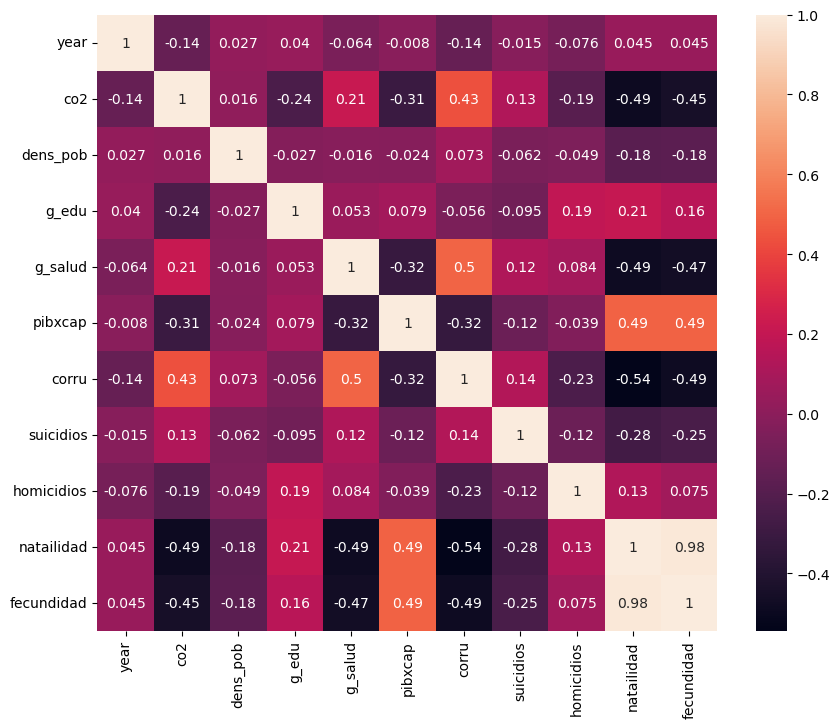

In [712]:
data_corr = numerical
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

- Natalidad y fecundidad están muy correlacionadas (obvio)
- las demás variables están bastante bien.


Nos cargaremos Fecundidad

In [713]:
data.drop(columns = ['fecundidad'],inplace = True)

In [714]:
numerical = data.select_dtypes(np.number)

In [715]:
numerical.drop(columns = ['life_expectancy'],inplace = True)

## Outliers

In [716]:
import warnings
warnings.filterwarnings('ignore')

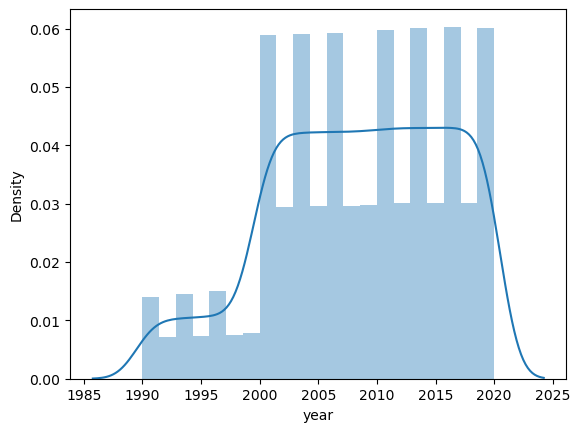

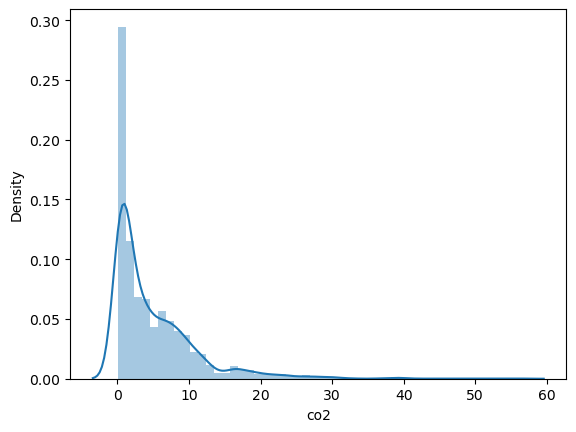

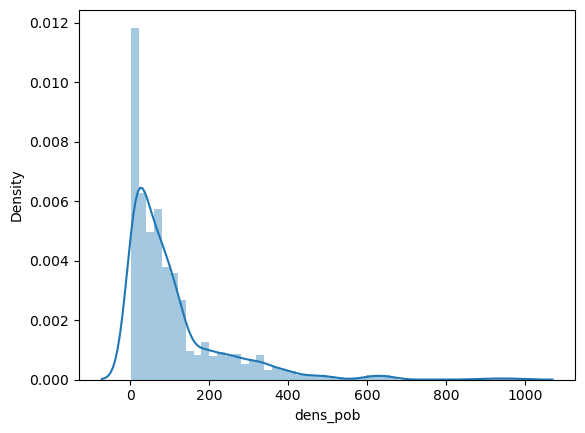

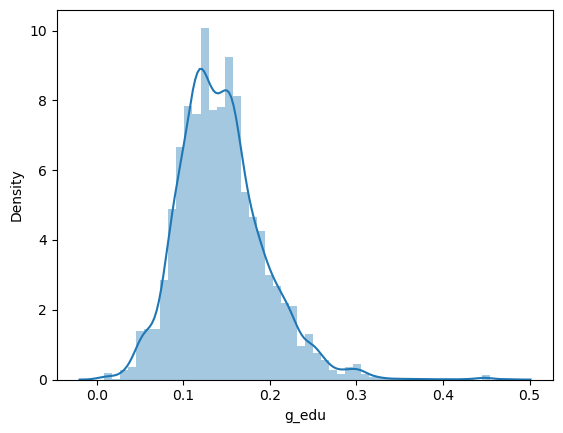

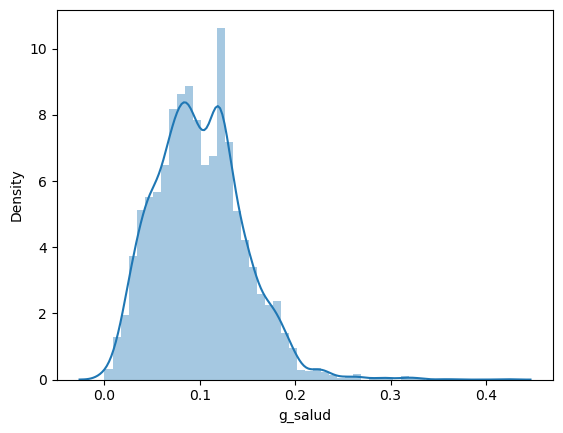

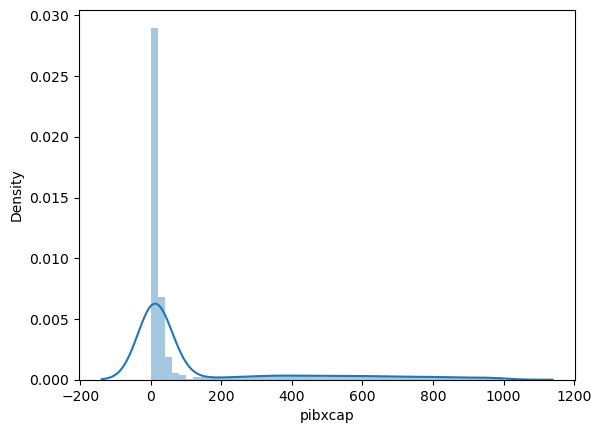

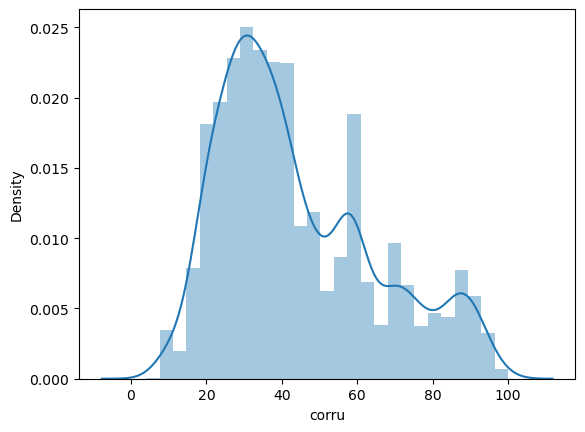

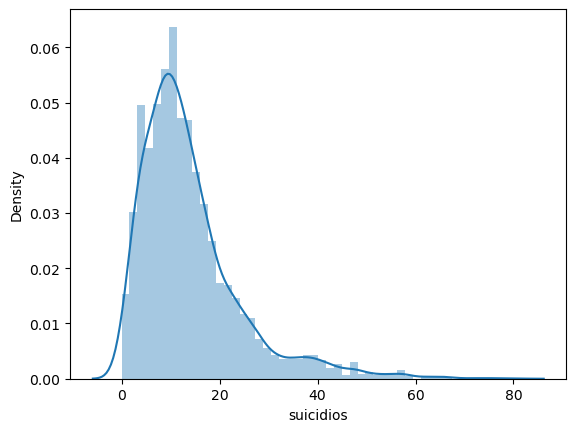

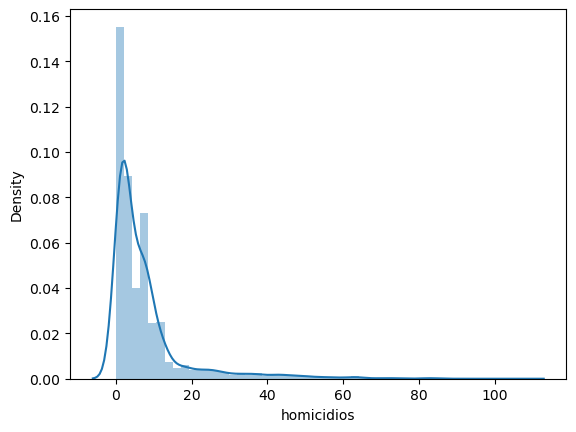

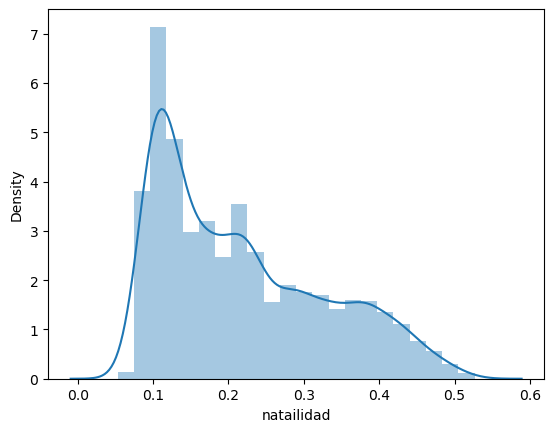

In [717]:
for i in numerical.columns.to_list():
    sns.distplot(numerical[i])
    plt.show()

## CO2 mucho outlier. Log - Check - cut

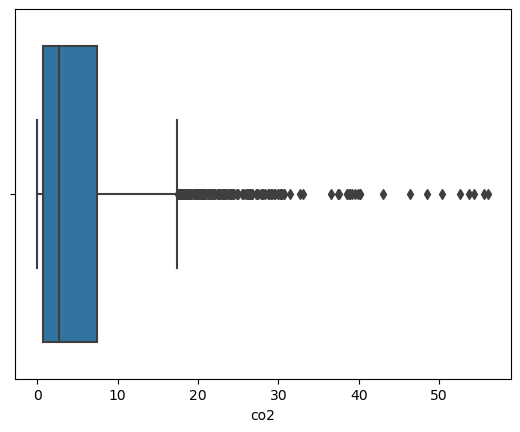

In [718]:
sns.boxplot(x=data['co2'])
plt.show()

In [719]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [720]:
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN

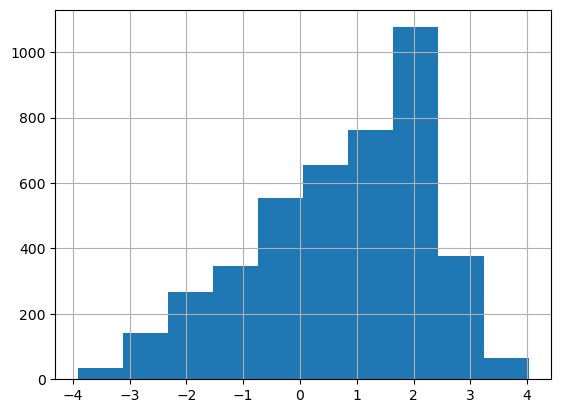

In [721]:
pd.Series(map(log_transfom_clean_, data['co2'])).hist()
plt.show()

In [722]:
# Escogemos SQRT para evitar tener valores negativos

In [723]:
data['co2'] = list(map(log_transfom_clean_, data['co2']))

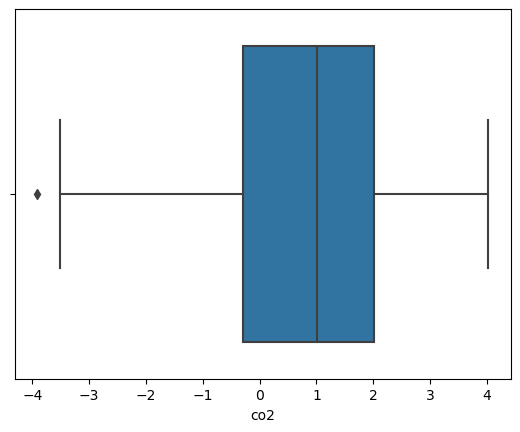

In [724]:
sns.boxplot(x=data['co2'])
plt.show()

In [725]:
iqr = np.percentile(data['co2'],75) - np.percentile(data['co2'],25)
upper_limit = np.percentile(data['co2'],75) + 1.5*iqr
print(upper_limit)

new_df = data[data['co2'] > upper_limit]
len(new_df)

5.448700230790173


0

In [726]:
#data = data[data['co2'] < upper_limit]

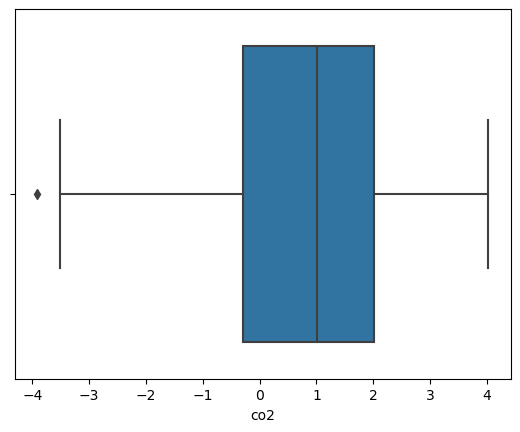

In [727]:
sns.boxplot(x=data['co2'])
plt.show()

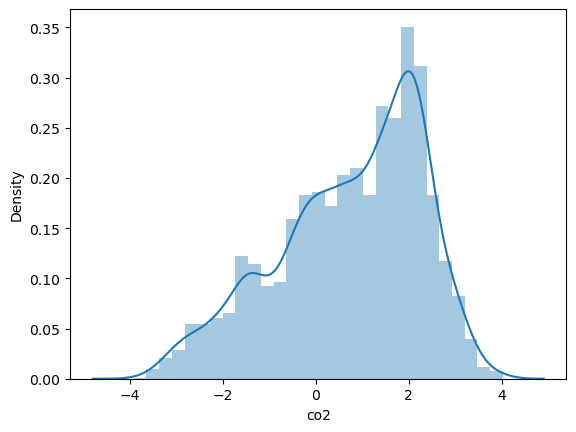

In [728]:
sns.distplot(data['co2'])
plt.show()

## densidad población - Mismo método CO2: log - check - cut

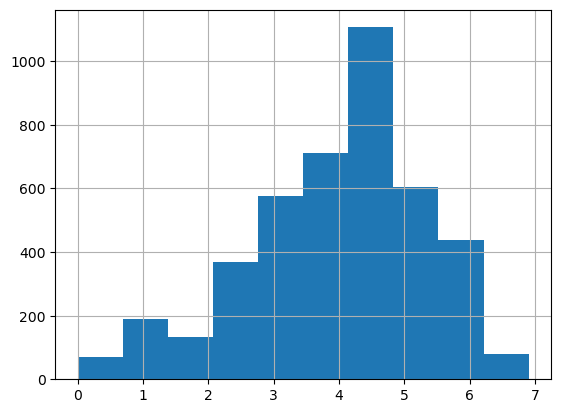

In [729]:
#Nos quedamos con LOG porque tiene mejor pinta el histplot. La curva queda más al medio
pd.Series(map(log_transfom_clean_, data['dens_pob'])).hist()
plt.show()

In [730]:
data['dens_pob'] = list(map(log_transfom_clean_, data['dens_pob']))

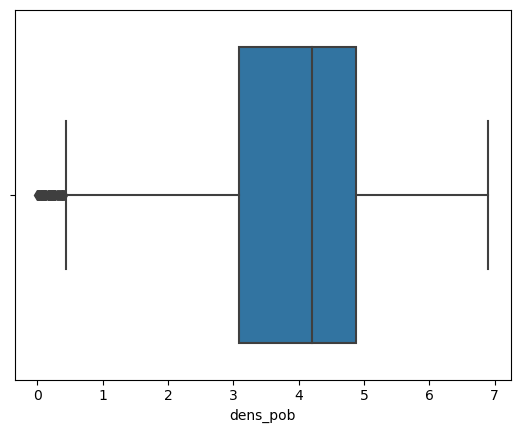

In [731]:
sns.boxplot(x=data['dens_pob'])
plt.show()

In [732]:
iqr = np.percentile(data['dens_pob'],25) - np.percentile(data['dens_pob'],75)
lower_limit = np.percentile(data['dens_pob'],25) + 1.5*iqr
print(lower_limit)

new_df = data[data['dens_pob'] < lower_limit]
len(new_df)

0.4148101485940634


51

In [733]:
np.percentile(data['dens_pob'],25) - np.percentile(data['dens_pob'],75)


-1.7841548698428351

In [734]:
#data = data[data['dens_pob'] > lower_limit]

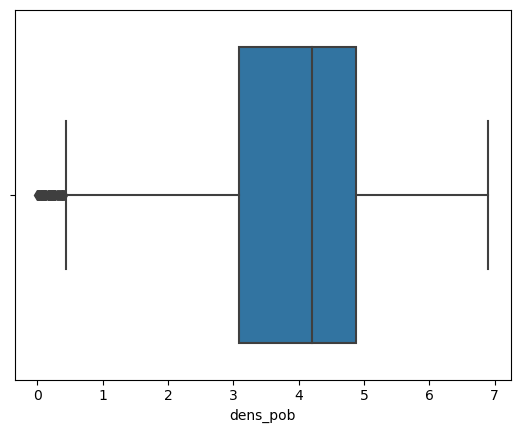

In [735]:
sns.boxplot(x=data['dens_pob'])
plt.show()

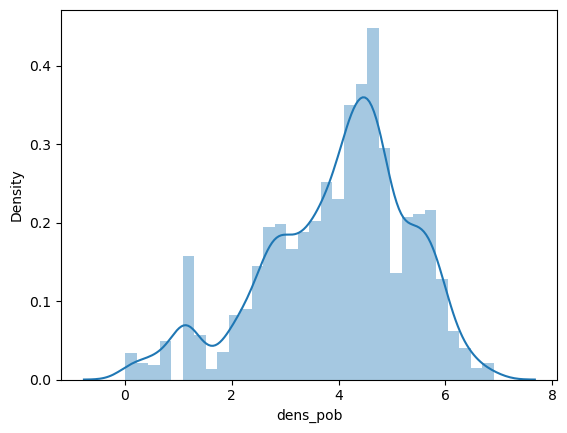

In [736]:
sns.distplot(data['dens_pob'])
plt.show()

## g_edu: Miramos solo outliers, la distribución etá bastante enmedio

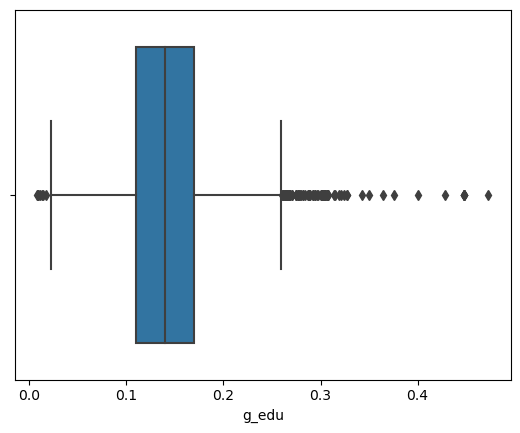

In [737]:
sns.boxplot(x=data['g_edu'])
plt.show()

In [738]:
#Nos cargamos estos 88
iqr = np.percentile(data['g_edu'],75) - np.percentile(data['g_edu'],25)
upper_limit = np.percentile(data['g_edu'],75) + 1.5*iqr
print(upper_limit)

new_df = data[data['g_edu'] > upper_limit]
len(new_df)

0.26


92

In [739]:
#Estos 8 los dejamos
iqr = np.percentile(data['g_edu'],25) - np.percentile(data['g_edu'],75)
lower_limit = np.percentile(data['g_edu'],25) + 1.5*iqr
print(lower_limit)

new_df = data[data['g_edu'] < lower_limit]
len(new_df)

0.019999999999999976


8

In [740]:
data = data[data['g_edu'] < upper_limit]

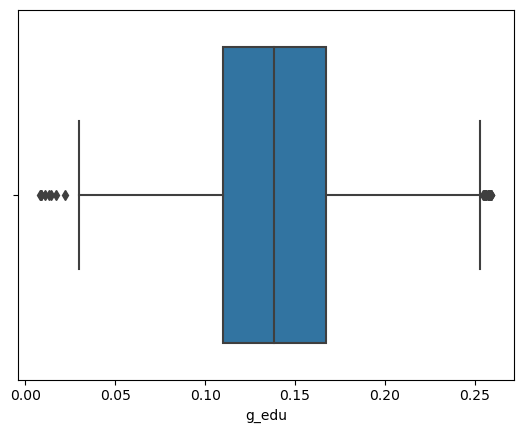

In [741]:
sns.boxplot(x=data['g_edu'])
plt.show()

## g_salud: lo mismo que para g_edu

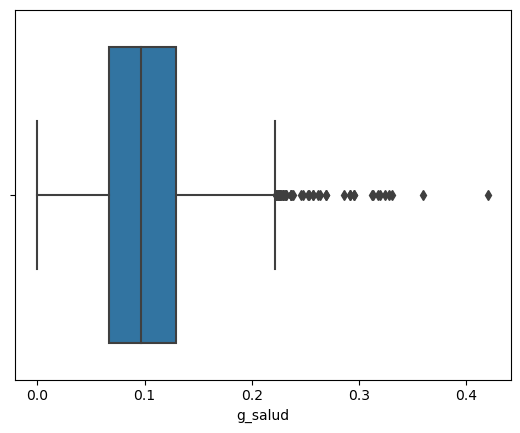

In [742]:
sns.boxplot(x=data['g_salud'])
plt.show()

In [743]:
#Nos cargamos estos 50
iqr = np.percentile(data['g_salud'],75) - np.percentile(data['g_salud'],25)
upper_limit = np.percentile(data['g_salud'],75) + 1.5*iqr
print(upper_limit)

new_df = data[data['g_salud'] > upper_limit]
len(new_df)

0.2224125


49

In [744]:
data = data[data['g_salud'] < upper_limit]

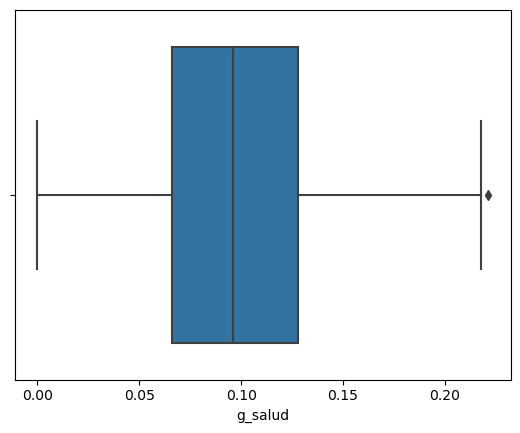

In [745]:
sns.boxplot(x=data['g_salud'])
plt.show()

## pibxcap - Log de manual chekc - cut

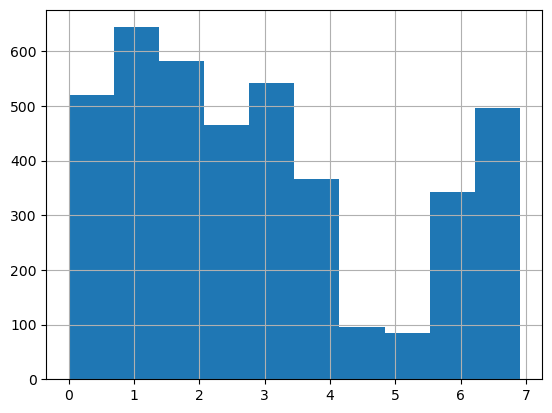

In [746]:
#Log me gusta mas que sqrt
pd.Series(map(log_transfom_clean_, data['pibxcap'])).hist()
plt.show()

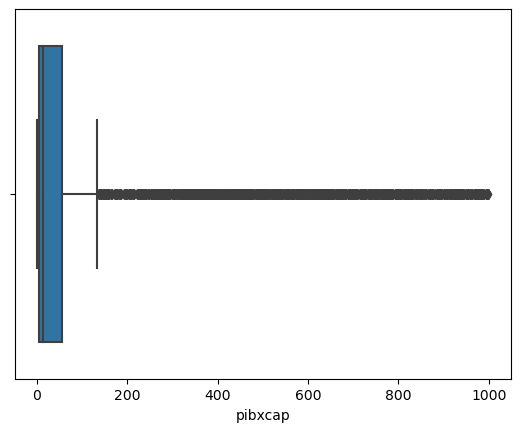

In [747]:
sns.boxplot(x=data['pibxcap'])
plt.show()

In [748]:
data['pibxcap'] = list(map(log_transfom_clean_, data['pibxcap']))

In [749]:
iqr = np.percentile(data['pibxcap'],75) - np.percentile(data['pibxcap'],25)
upper_limit = np.percentile(data['pibxcap'],75) + 3.5*iqr
print(upper_limit)

new_df = data[data['pibxcap'] > upper_limit]
len(new_df)


13.72008095077851


0

In [750]:
#data = data[data['pibxcap'] < upper_limit]

In [751]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4139 entries, 0 to 5978
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais             4139 non-null   object 
 1   year             4139 non-null   int32  
 2   life_expectancy  4139 non-null   float64
 3   co2              4139 non-null   float64
 4   dens_pob         4139 non-null   float64
 5   g_edu            4139 non-null   float64
 6   g_salud          4139 non-null   float64
 7   pibxcap          4139 non-null   float64
 8   corru            4139 non-null   float64
 9   suicidios        4139 non-null   float64
 10  homicidios       4139 non-null   float64
 11  natailidad       4139 non-null   float64
 12  continente       4139 non-null   object 
dtypes: float64(10), int32(1), object(2)
memory usage: 436.5+ KB


In [752]:
#Son muchos, probamos de dejarlo así por ahora


## Corru - a ver qué

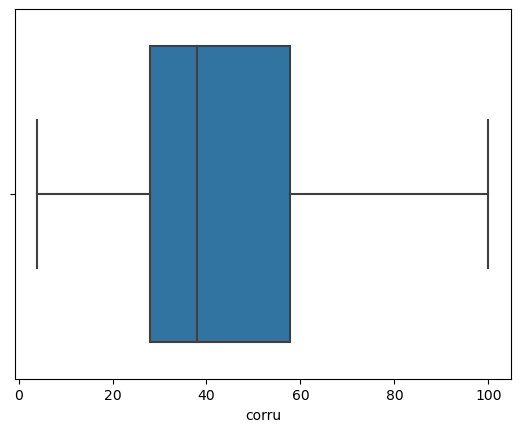

In [753]:
sns.boxplot(x=data['corru'])
plt.show()

In [754]:
#La dejo tal cual, supongo que porque había muchos outliers

## Suicidios - con un log debería estar

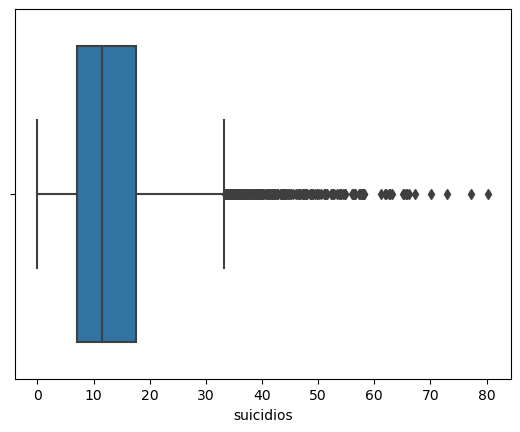

In [755]:
sns.boxplot(x=data['suicidios'])
plt.show()

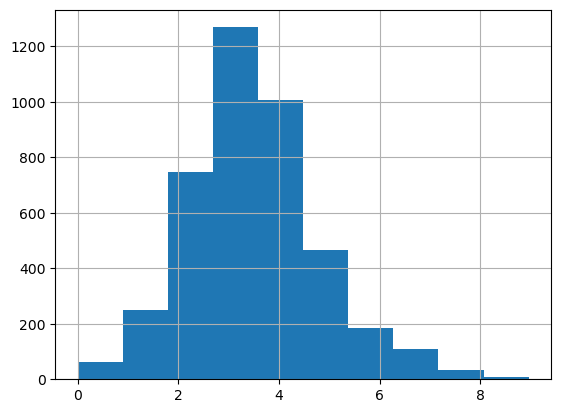

In [756]:
pd.Series(map(sqrt_transfom_clean_, data['suicidios'])).hist()
plt.show()

In [757]:
data['suicidios'] = list(map(sqrt_transfom_clean_, data['suicidios']))

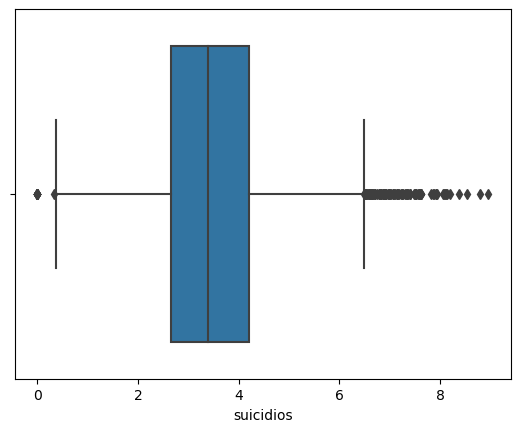

In [758]:
sns.boxplot(x=data['suicidios'])
plt.show()

In [759]:
iqr = np.percentile(data['suicidios'],75) - np.percentile(data['suicidios'],25)
upper_limit = np.percentile(data['suicidios'],75) + 1.5*iqr
print(upper_limit)

new_df = data[data['suicidios'] > upper_limit]
len(new_df)

6.492704277097813


113

In [760]:
#Por ahora lo dejaremos así

## homicidios - otro log

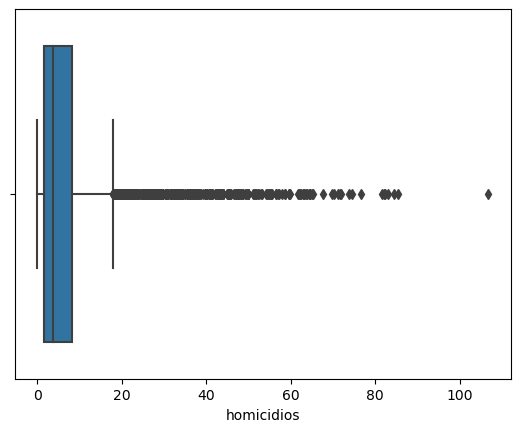

In [761]:
sns.boxplot(x=data['homicidios'])
plt.show()

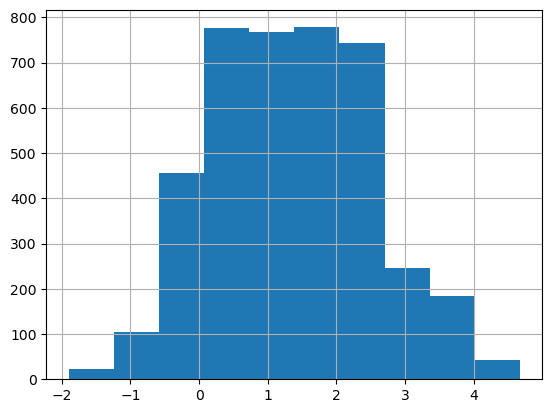

In [762]:
#Probamos a dejarlo así
pd.Series(map(log_transfom_clean_, data['homicidios'])).hist()
plt.show()

In [763]:
data['homicidios'] = list(map(sqrt_transfom_clean_, data['homicidios']))

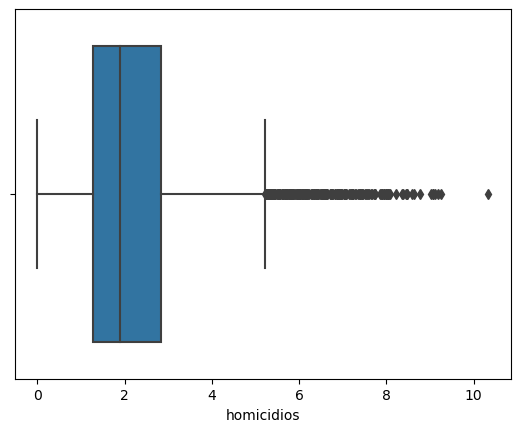

In [764]:
sns.boxplot(x=data['homicidios'])
plt.show()

In [765]:
#Eliminamos estas 34 muestras a ver qué tal
iqr = np.percentile(data['homicidios'],75) - np.percentile(data['homicidios'],25)
upper_limit = np.percentile(data['homicidios'],75) + 3*iqr
print(upper_limit)

new_df = data[data['homicidios'] > upper_limit]
len(new_df)

7.57540313063946


37

In [766]:
data = data[data['homicidios'] < upper_limit]

In [767]:
#Lo dejaremos asi a ver


## natalidad - Mirar un poco


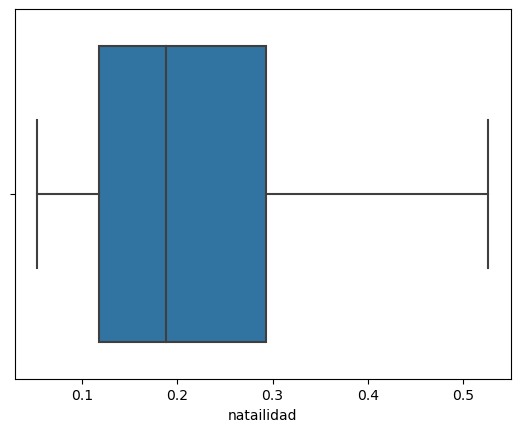

In [768]:
sns.boxplot(x=data['natailidad'])
plt.show()

In [769]:
#La dejaremos así

In [770]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4102 entries, 0 to 5978
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais             4102 non-null   object 
 1   year             4102 non-null   int32  
 2   life_expectancy  4102 non-null   float64
 3   co2              4102 non-null   float64
 4   dens_pob         4102 non-null   float64
 5   g_edu            4102 non-null   float64
 6   g_salud          4102 non-null   float64
 7   pibxcap          4102 non-null   float64
 8   corru            4102 non-null   float64
 9   suicidios        4102 non-null   float64
 10  homicidios       4102 non-null   float64
 11  natailidad       4102 non-null   float64
 12  continente       4102 non-null   object 
dtypes: float64(10), int32(1), object(2)
memory usage: 432.6+ KB


## Normalizamos

In [771]:
data.drop(columns = ['year','pais','continente'], inplace=True)

In [772]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4102 entries, 0 to 5978
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   life_expectancy  4102 non-null   float64
 1   co2              4102 non-null   float64
 2   dens_pob         4102 non-null   float64
 3   g_edu            4102 non-null   float64
 4   g_salud          4102 non-null   float64
 5   pibxcap          4102 non-null   float64
 6   corru            4102 non-null   float64
 7   suicidios        4102 non-null   float64
 8   homicidios       4102 non-null   float64
 9   natailidad       4102 non-null   float64
dtypes: float64(10)
memory usage: 352.5 KB


In [773]:
data_norm = data.drop(columns = 'life_expectancy',)

In [774]:
transformer=StandardScaler().fit(data_norm)
x_normalized=transformer.transform(data_norm)
print(x_normalized.shape)
data_norm = pd.DataFrame(x_normalized)

(4102, 9)


In [775]:
data_norm

,0,1,2,3,4,5,6,7,8
0,0.646213,0.274582,-0.875425,0.527097,-0.300135,0.660462,-0.571928,-0.856784,-1.017549
1,1.139532,1.048561,-0.680080,0.527097,-0.099051,0.660462,0.902286,-0.880152,-0.911583
2,0.994835,1.086711,-0.657366,0.527097,-0.152196,0.660462,-0.503889,-0.853500,-0.696057
3,0.732411,0.507230,-0.988997,0.527097,-0.053123,0.660462,0.701597,-0.537539,-0.740958
4,0.794734,0.924294,-0.680080,0.527097,-0.093318,0.660462,-0.544451,-0.370130,-1.046286
...,...,...,...,...,...,...,...,...,...
4097,-0.159753,0.205210,0.503345,0.428685,-0.782278,0.881225,-0.454884,-0.897274,0.536031
4098,-1.106380,0.093011,0.248942,-2.284671,1.639141,-1.388525,-0.268827,-0.703389,0.862014
4099,0.770171,-0.054398,1.257466,0.841078,-0.657313,-0.002783,-1.991839,2.597698,-0.118628
4100,-1.012636,-0.544206,-0.366620,-0.677277,1.839722,-0.528409,-0.263998,0.178185,1.194283


In [776]:
data_norm = data_norm.rename(columns={0:'co2',
                            1:'dens_pob',
                            2:'g_edu',
                            3:'g_salud',
                            4:'pibxcap',
                            5:'corru',
                            6:'suicidios',
                            7:'homicidios',
                            8:'natalidad',
                            })

## Train-Test Split

In [777]:
data

,life_expectancy,co2,dens_pob,g_edu,g_salud,pibxcap,corru,suicidios,homicidios,natailidad
0,76.91,1.773256,4.343805,0.1014,0.1200,2.335149,57.88,2.756810,1.113553,0.1032
1,77.40,2.544747,5.407172,0.1100,0.1200,2.748232,57.88,4.690416,1.081665,0.1150
2,75.88,2.318458,5.459586,0.1110,0.1200,2.639057,57.88,2.846050,1.118034,0.1390
3,76.60,1.908060,4.663439,0.0964,0.1200,2.842581,57.88,4.427189,1.549193,0.1340
4,77.10,2.005526,5.236442,0.1100,0.1200,2.760010,57.88,2.792848,1.777639,0.1000
...,...,...,...,...,...,...,...,...,...,...
5974,70.34,0.512824,4.248495,0.1621,0.1158,1.344691,62.50,2.910326,1.058301,0.2762
5975,61.64,-0.967584,4.094345,0.1509,0.0000,6.318968,15.00,3.154362,1.322876,0.3125
5976,62.18,1.967112,3.891820,0.1953,0.1334,1.601406,44.00,0.894427,5.827521,0.2033
5977,59.64,-0.820981,3.218876,0.1238,0.0686,6.731018,33.00,3.160696,2.525866,0.3495


In [778]:
#data.drop(columns=['pais','year','continente'],inplace = True)

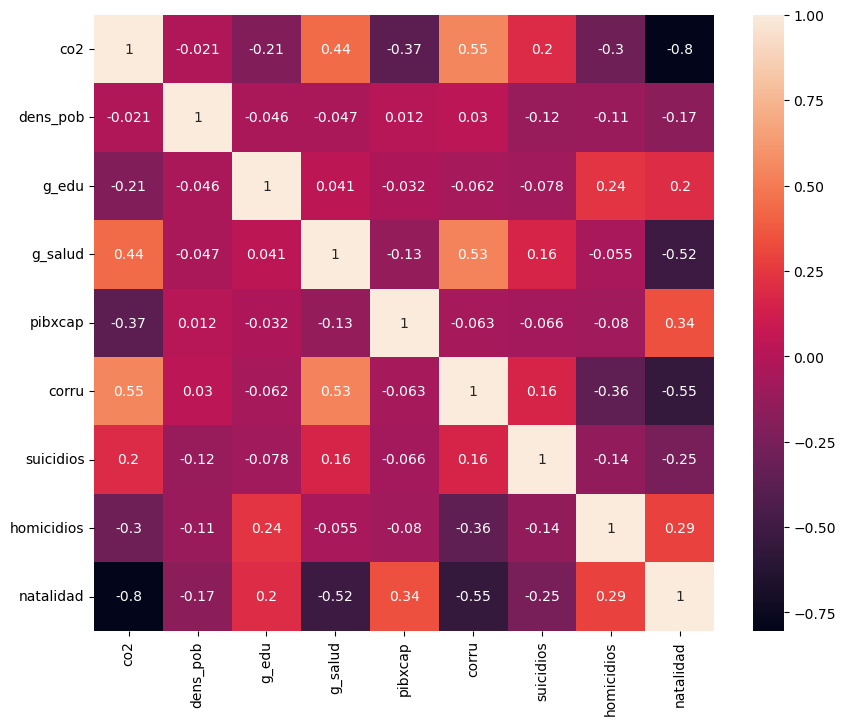

In [779]:
data_corr = data_norm
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [780]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [781]:
model = LinearRegression().fit(data_corr[['natalidad']], data_corr[['co2']])
model.score(data_corr[['natalidad']], data_corr[['co2']])

0.6458906985972939

In [782]:
#data.drop(columns = "g_edu", inplace=True)
#data.drop(columns = 'dens_pob', inplace = True)

In [783]:
data = data.reset_index(drop=True)

In [784]:
X = data_norm
y = data.life_expectancy

In [785]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [786]:
X_train.shape

(3076, 9)

In [787]:
X_test.shape

(1026, 9)

In [788]:
y_train.shape

(3076,)

In [789]:
y_test.shape

(1026,)

In [790]:
#data = data.reset_index(drop=True)

In [791]:
#data_norm

In [792]:
X_train_sm = sm.add_constant(X)

model = sm.OLS(y,X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1765.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        16:36:38   Log-Likelihood:                -11346.
No. Observations:                4102   AIC:                         2.271e+04
Df Residuals:                    4092   BIC:                         2.278e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.8556      0.060   1128.577      0.0

In [808]:
x =  -0.3302
antilogaritmo = math.exp(x)
print("Antilogaritmo de", x, "es", antilogaritmo)

Antilogaritmo de -0.3302 es 0.7187799630627559


In [810]:
raiz_cuadrada_resultado = 1.94

# Calculamos el valor original elevando al cuadrado
valor_original = raiz_cuadrada_resultado ** 2

# Alternativamente, podrías usar la función pow()
# valor_original = pow(raiz_cuadrada_resultado, 2)

print("El valor original es:", valor_original)

El valor original es: 3.7636


In [794]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
print("R2 value is = ",round(lm.score(X_train,y_train),2))

R2 value is =  0.8


In [795]:
predictions=lm.predict(X_test)
predictions

mse=mean_squared_error(y_test, predictions)
print(f'mse = {mse}')

rmse=math.sqrt(mse)
print(f'rmse = {rmse}')

r2=r2_score(y_test, predictions)
print(f'r2 = {r2}')

mse = 14.885297913055172
rmse = 3.858146953273705
r2 = 0.7808832562096395


## Primer modelo

R2 = 0.79


Predicciones:
- mse: 14.4
- rmse: 3.08
- r2 = 0.80

variables:
- CO2 --> SQRT & cut at 1.5
- dens_pob --> lower cut at 1.5
- g_edu --> cut at 1.5
- g_salud --> cut at 1.5
- pibxcap --> LOG no cut
- corru --> no change
- suidicios --> LOG no cut
- homicidios --> LOG cut at 3
- natailidad --> no change

'NO ha habido normalización'

mismo resultado quitando varaiable dens_pob

In [796]:
mse=mean_squared_error(y_test, predictions)
print(mse)

rmse=math.sqrt(mse)
print(rmse)

r2=r2_score(y_test, predictions)
print(r2)

14.885297913055172
3.858146953273705
0.7808832562096395


In [797]:
data['life_expectancy'].max()

83.1

In [ ]:
data['life_expectancy'].min()

## Segundo modelo

R2 = 0.74


Predicciones:
- mse: 14.4
- rmse: 3.08
- r2 = 0.80

variables:
- CO2 --> SQRT & cut at 1.5
- dens_pob --> lower cut at 1.5
- g_edu --> cut at 1.5
- g_salud --> cut at 1.5
- pibxcap --> LOG cut at 3.5
- corru --> no change
- suidicios --> LOG no cut
- homicidios --> LOG cut at 3
- natailidad --> no change

'NO ha habido normalización'

In [ ]:
predictions=lm.predict(X_test)
predictions

mse=mean_squared_error(y_test, predictions)
print(mse)

rmse=math.sqrt(mse)
print(rmse)

r2=r2_score(y_test, predictions)
print(r2)

## Tercer Modelo

R2 = 0.79


Predicciones:
- mse: 14.25
- rmse: 3.77
- r2 = 0.78

variables:
- CO2 --> SQRT & cut at 1.5
- dens_pob --> lower cut at 1.5
- g_edu --> cut at 1.5
- g_salud --> cut at 1.5
- pibxcap --> LOG
- corru --> no change
- suidicios --> LOG no cut
- homicidios --> LOG NO cut at 3
- natailidad --> no change

'NO ha habido normalización'

## Modelo 4

R2 = 0.79


Predicciones:
- mse: 14.95
- rmse: 3.86
- r2 = 0.79

variables:
- CO2 --> SQRT & cut at 1.5
- dens_pob --> lower cut at 1.5
- g_edu --> cut at 1.5
- g_salud --> no change
- pibxcap --> LOG
- corru --> no change
- suidicios --> LOG no cut
- homicidios --> LOG NO cut at 3
- natailidad --> no change

'NO ha habido normalización'

## modelo 5

R2 = 0.788


Predicciones:
- mse: 15.69
- rmse: 3.96
- r2 = 0.78

variables:
- CO2 --> SQRT & cut at 1.5
- dens_pob --> lower cut at 1.5
- g_edu --> no change
- g_salud --> no change
- pibxcap --> LOG
- corru --> no change
- suidicios --> LOG no cut
- homicidios --> LOG 
- natailidad --> no change

'NO ha habido normalización'

## Modelo 6

R2 = 0.786


Predicciones:
- mse: 15.31
- rmse: 3.91
- r2 = 0.78

variables:
- CO2 --> SQRT & cut at 1.5
- dens_pob --> lower cut at 1.5
- g_edu --> DROP
- g_salud --> no change
- pibxcap --> LOG
- corru --> no change
- suidicios --> LOG no cut
- homicidios --> LOG 
- natailidad --> no change


'NO ha habido normalización'

## Modelo 7

R2 = 0.788


Predicciones:
- mse: 15.90
- rmse: 3.98
- r2 = 0.77

variables:
- CO2 --> SQRT & cut at 1.5
- dens_pob --> lower cut at 1.5
- g_edu --> DROP
- g_salud --> cut at 1.5
- pibxcap --> LOG
- corru --> no change
- suidicios --> LOG no cut
- homicidios --> LOG 
- natailidad --> no change

'NO ha habido normalización'